<a href="https://colab.research.google.com/github/Tawheed-tariq/basic-ml-projects/blob/main/7.Bikes%20regression/Bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import copy
import tensorflow as tf

In [23]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv('./drive/MyDrive/SeoulBikeData.csv').drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [24]:
df["functional"] = (df["functional"] == "yes").astype(int)
df = df.drop(['hour', "wind", "visibility", "functional"], axis=1)

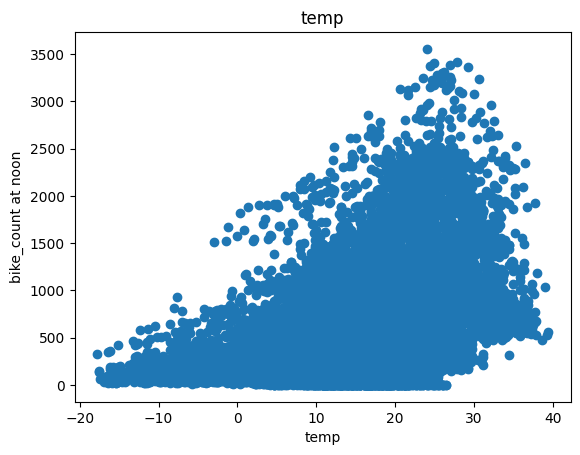

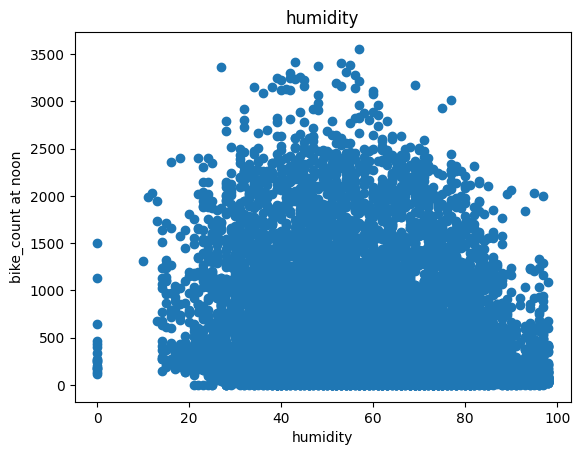

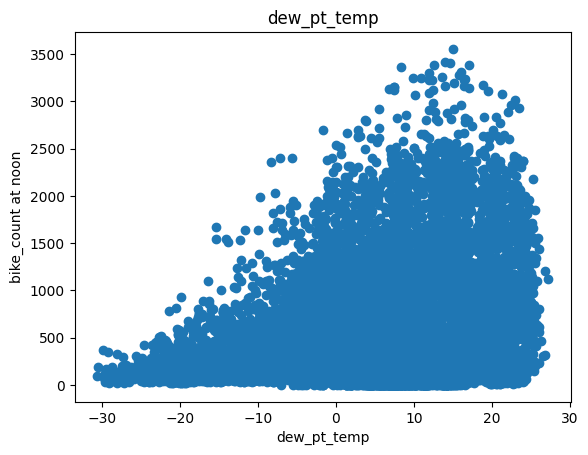

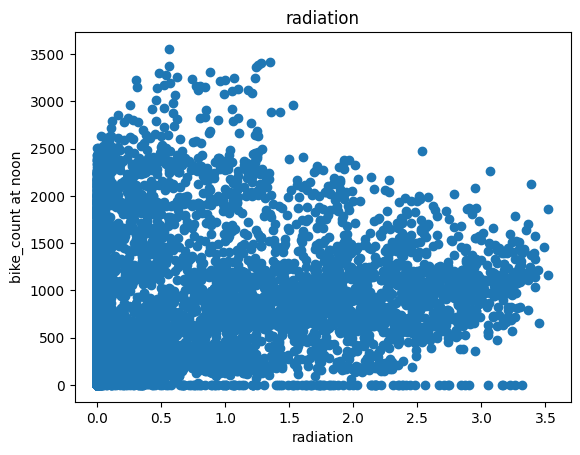

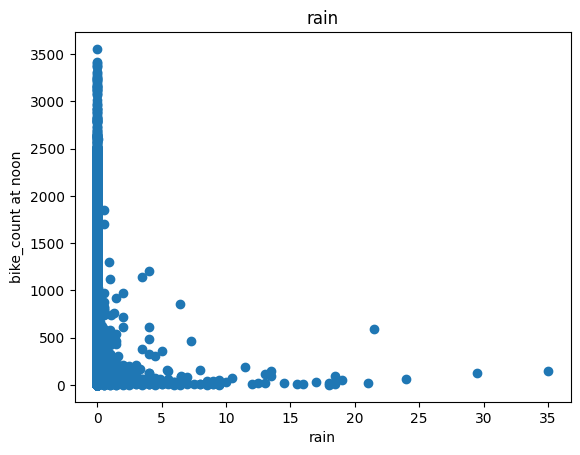

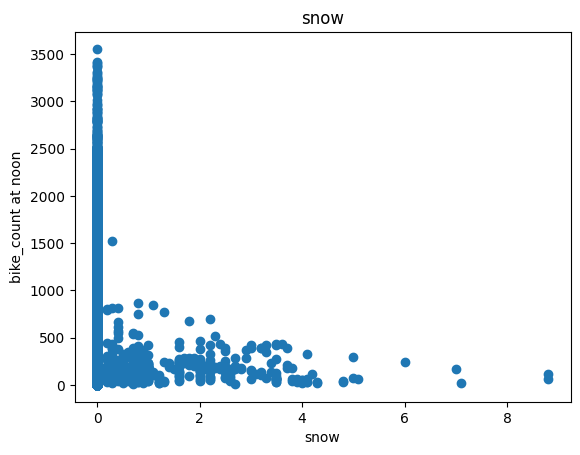

In [25]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.xlabel(label)
    plt.ylabel('bike_count at noon')
    plt.title(label)
    plt.show()

## Tarining validation and test dataset

In [27]:
train_val , test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)

In [28]:
def get_xy(dataframe, y_label, x_label=None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        x_label = [col for col in dataframe.columns if col != y_label]
        X = dataframe[x_label].values
    elif len(x_label) == 1:
        X = dataframe[x_label[0]].values.reshape(-1,1)
    else:
        X = dataframe[x_label].values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X, y))
    return data, X, y

In [31]:
_ , X_train_temp , y_train_temp = get_xy(train, 'bike_count', x_label=["temp"])
_ , X_val_temp , y_val_temp = get_xy(val, 'bike_count', x_label=["temp"])
_ , X_test_temp , y_test_temp = get_xy(test, 'bike_count', x_label=["temp"])

In [36]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)
temp_reg.score(X_train_temp, y_train_temp)

0.28592023278378353

In [35]:
print(temp_reg.coef_, temp_reg.intercept_)

[[29.11161846]] [329.01645228]


In [37]:
temp_reg.score(X_test_temp, y_test_temp)

0.2963595920115133

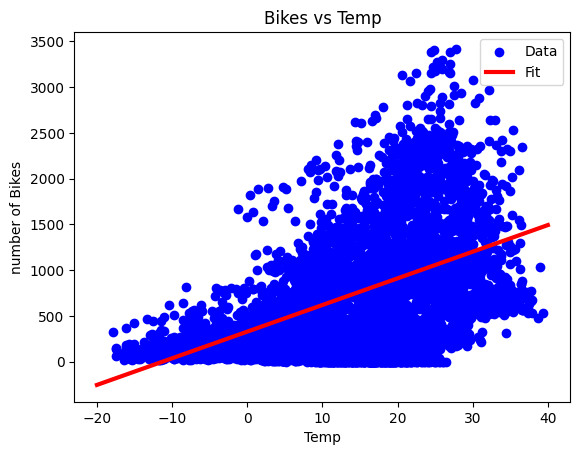

In [41]:
plt.scatter(X_train_temp, y_train_temp, color='blue', label="Data")
x = tf.linspace(-20, 40 , 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("number of Bikes")
plt.show()

# Multiple Linear Regression

In [42]:
_, X_train , y_train = get_xy(train, 'bike_count')
_, X_val , y_val = get_xy(val, 'bike_count')
_, X_test , y_test = get_xy(test, 'bike_count')

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.38874320136080665

In [45]:
lin_reg.score(X_val, y_val)

0.38684468109885517

# Regression With Neural Network

In [49]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [56]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])
temp_nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [51]:
temp_nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [52]:
history = temp_nn_model.fit(X_train_temp, y_train_temp, epochs=100, verbose=0, validation_data=(X_val_temp, y_val_temp))

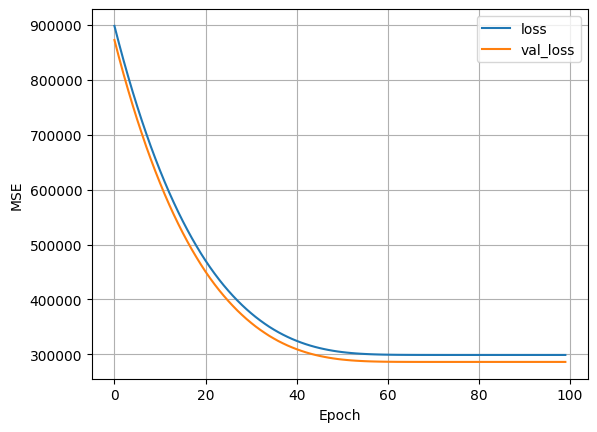

In [57]:
plot_loss(history)

4/4 [==============================] - 1s 3ms/step


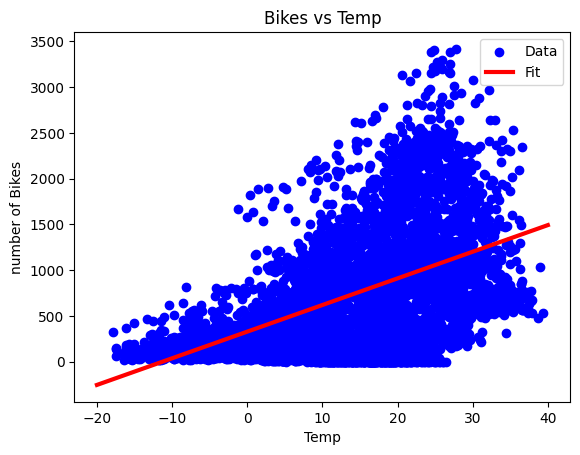

In [58]:
plt.scatter(X_train_temp, y_train_temp, color='blue', label="Data")
x = tf.linspace(-20, 40 , 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("number of Bikes")
plt.show()

# Neural Network

In [67]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_10 (Dense)            (None, 128)               256       
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16900 (66.02 KB)
Trainable params: 16897 (66.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [68]:
nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [69]:
history = nn_model.fit(X_train_temp, y_train_temp, epochs=100, verbose=0, validation_data=(X_val_temp, y_val_temp))

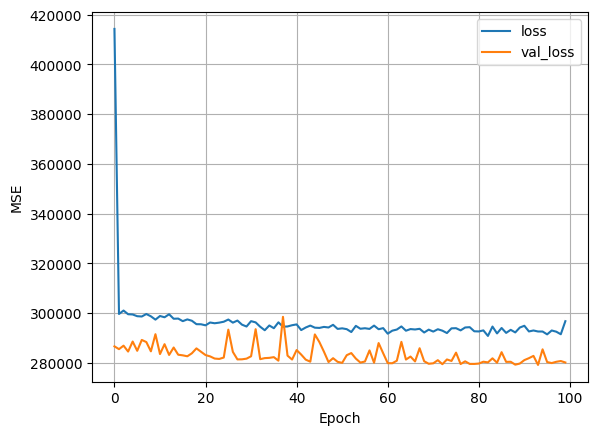

In [70]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


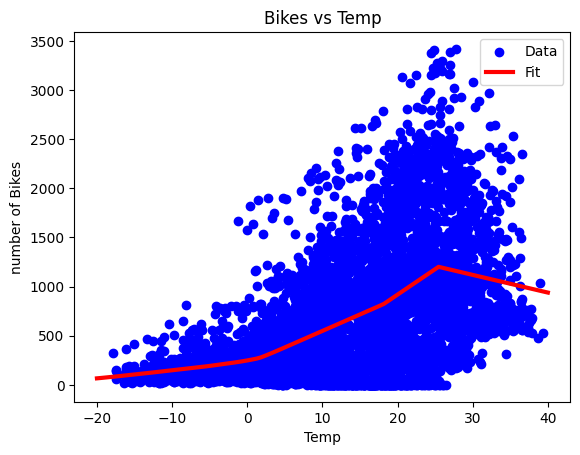

In [71]:
plt.scatter(X_train_temp, y_train_temp, color='blue', label="Data")
x = tf.linspace(-20, 40 , 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("number of Bikes")
plt.show()

In [72]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,1), axis=-1)
all_normalizer.adapt(X_train)
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 6, 6)              13        
 tion)                                                           
                                                                 
 dense_13 (Dense)            (None, 6, 128)            896       
                                                                 
 dense_14 (Dense)            (None, 6, 128)            16512     
                                                                 
 dense_15 (Dense)            (None, 6, 1)              129       
                                                                 
Total params: 17550 (68.56 KB)
Trainable params: 17537 (68.50 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [73]:
nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [74]:
history = nn_model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

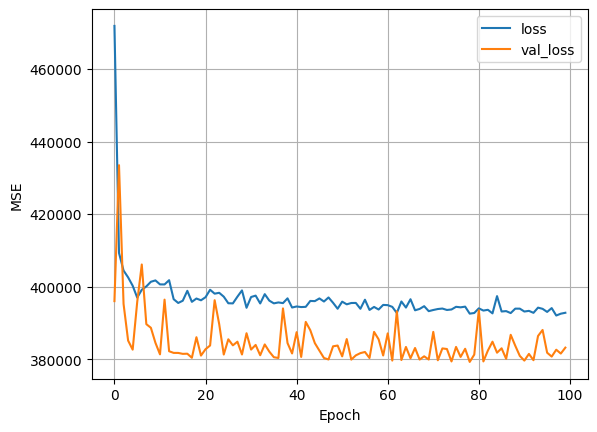

In [75]:
plot_loss(history)